# Mixture Models Clustering 

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [5]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig,)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c = y_pred)

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if sys.path[0] == '':


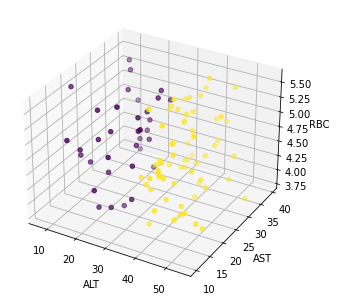

In [6]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
y_pred_KMeans2 = KMeans(2, init='k-means++', max_iter=300, n_init=10, random_state = 0).fit(EMR3d2).labels_

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Task 3 (_max score - 20 points_)
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this separation?

Answer:

The Kmeans algorithm does not properly account for the variance of the different, actual clusters. It works well only for certain shapes, and disributions of the clusters such as uniform. However, each attribute has its own distributions (gausssian or uniform), creating variances.

In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorith with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

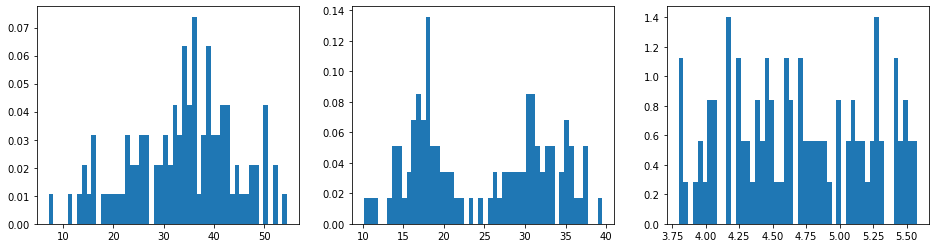

In [7]:
import scipy
plt.figure(figsize = (16, 4))
for i in range(EMR3d2.shape[1]):
    x = sorted(EMR3d2[:, i])
    plt.subplot(1,3,i+1)
    plt.hist(x, bins = 50, density = True)

    # normal = scipy.stats.norm(np.mean(x), np.std(x))
    # plt.plot(x, normal.pdf(x));


The parameters of the first Gaussian are mean = [31.76263257], and variance = [[12.61002424]]
The parameters of the second Gaussian are mean = [17.24934496], and variance = [[7.98567696]]


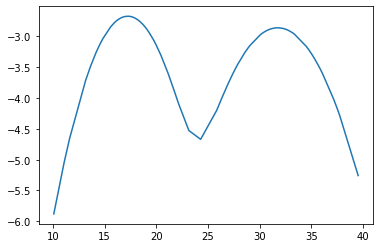

In [8]:
from sklearn.mixture import GaussianMixture

data = np.array(EMR3d2[:,1]).reshape(-1,1)
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(data)

x = np.array(sorted(data)).reshape(-1,1)
y = clf.score_samples(x)

print(f'The parameters of the first Gaussian are mean = {clf.means_[0]}, and variance = {clf.covariances_[0]}')
print(f'The parameters of the second Gaussian are mean = {clf.means_[1]}, and variance = {clf.covariances_[1]}')

plt.plot(x, y)
plt.show()

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if sys.path[0] == '':
C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if sys.path[0] == '':


Text(0.5, 0.92, 'GMM')

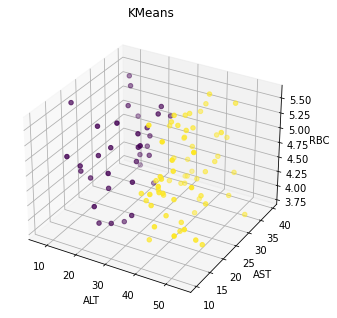

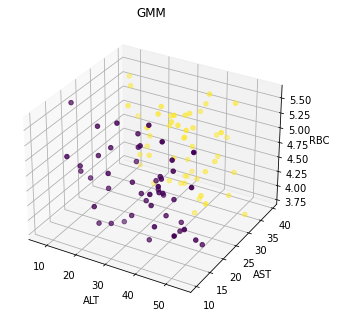

In [9]:
make_chart(EMR3d2, y_pred_KMeans2, variables2)
plt.title('KMeans')

gmm = GaussianMixture(2)
gmm.fit(data)
gm_labels = gmm.predict(data)

make_chart(EMR3d2, gm_labels, variables2) #Predicted just based of AST. Not sure why we would do this though...
plt.title('GMM')

The Kmeans version of the clustering produces two, generally, circular shapes. This is because, as mentioned, Kmeans does not account for levels of variation in the same way that other models do.

In the second GMM plot though, when using the compenents of the AST, we get two oval shapes in our clusters. Given that we know that AST is a joint distribution of two Guassians, this is expected. The variance of the Gaussians gives us wider, oval shapes in our clusters.